### **1. Importing Liabraries**

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **2. Loading Datasets**

In [212]:
data=pd.read_csv("../data/clean_data.csv",index_col=0)

In [213]:
data.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,label
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Train
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Train
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Train
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Train
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Train
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,Train
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,Train
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,Train
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,Train
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,Train


In [214]:
print("Dataset has " , data.shape[0] , " rows and ",data.shape[1] , " columns")

Dataset has  1852394  rows and  23  columns


In [215]:
print('column names: \n') 
print('\n'.join(list(data.columns)))

column names: 

trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud
label


### **3. Visualizing Traget Variable**

#### **3.1. Checking Target variable Distribution**

,count,distribution
genuine,1842743,99.478999
fraud,9651,0.521001


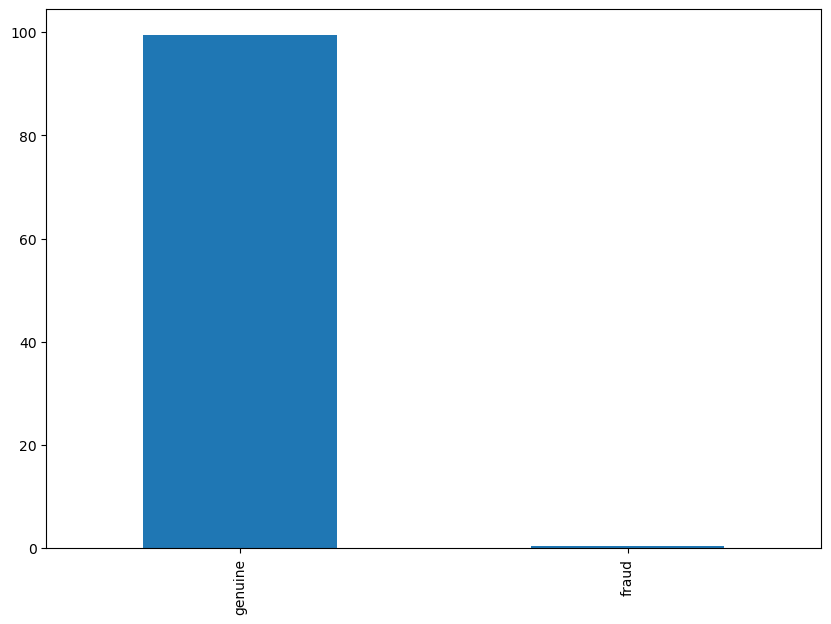

In [216]:
a = data['is_fraud'].value_counts().rename('count') # count of classes
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

We found out that Dataset is **highly Imbalanced** because 99.4% of data is **Genuine** and only 0.52% of data is **Fraud**

#### **3.2. Checking Target variable Distribution by Gender**

,Genuine,Fraud
F,1009850,4899
M,832893,4752


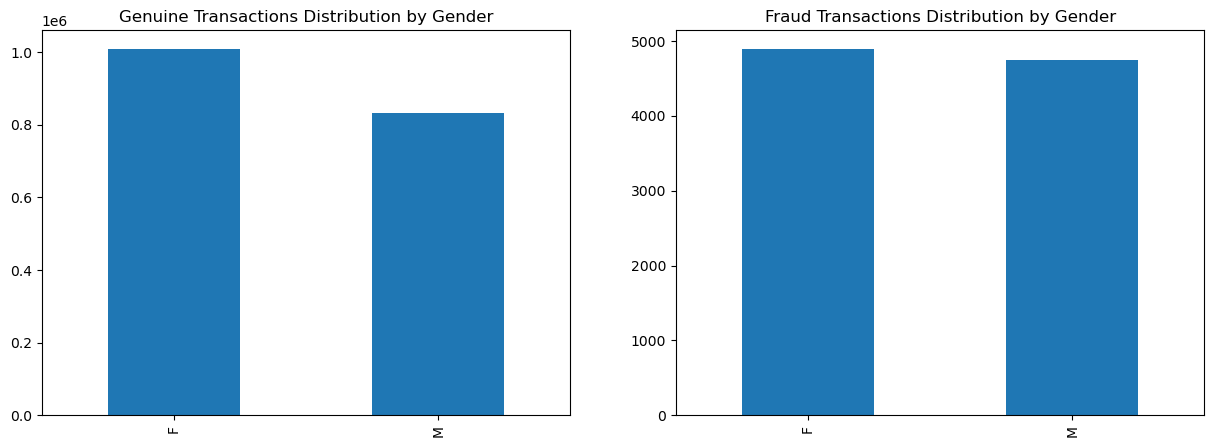

In [217]:
non_fraud=data[data['is_fraud']==0]
fraud=data[data['is_fraud']==1]


plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
non_fraud['gender'].value_counts().plot(kind='bar')
plt.title("Genuine Transactions Distribution by Gender")

plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind='bar')
plt.title("Fraud Transactions Distribution by Gender")

temp=pd.concat([non_fraud['gender'].value_counts().rename('Genuine'),fraud['gender'].value_counts().rename('Fraud')],axis=1)
temp

We can see that Fraudulent Transactions are **equally distributed** in **Male** and **Female** .So there is no differenece because of gender

#### **3.3. Checking Target variable Distribution by State**

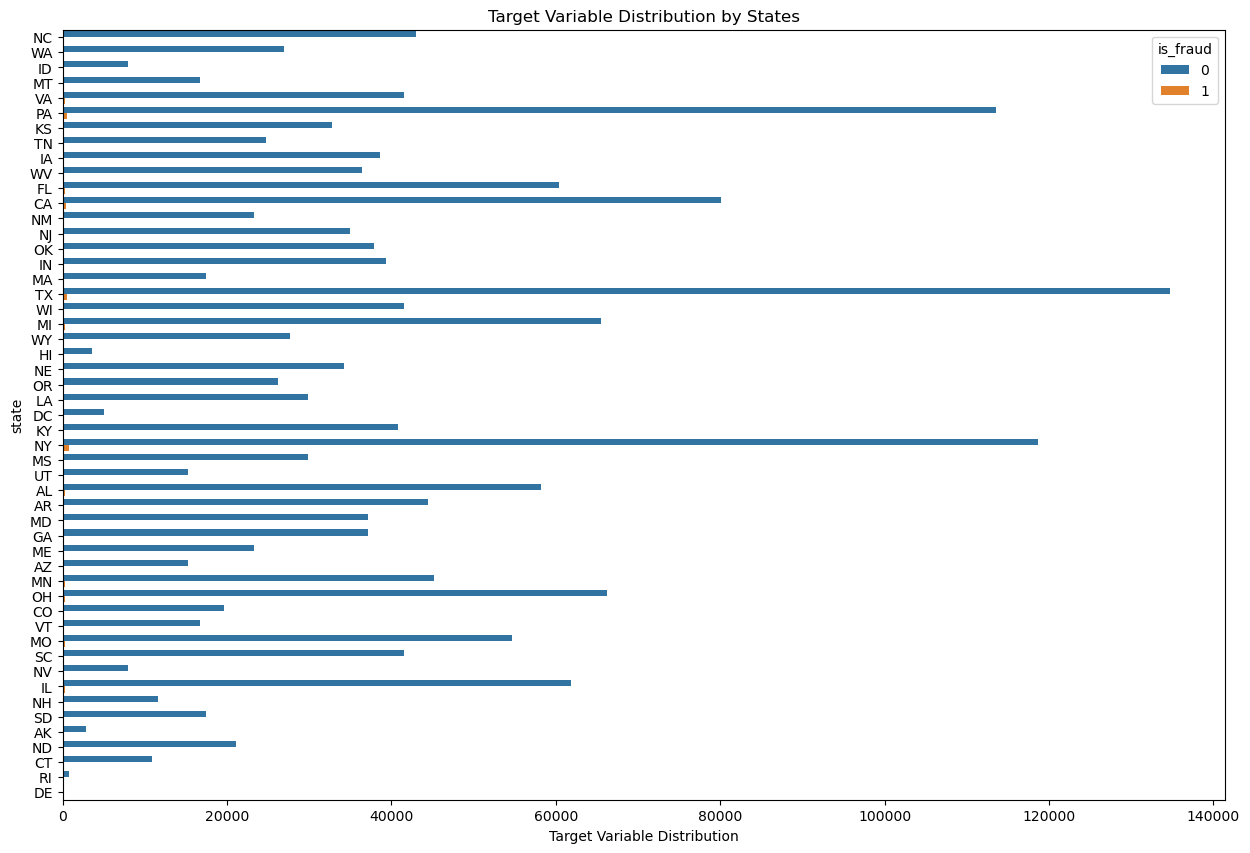

In [218]:
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by States")
plt.xlabel("Target Variable Distribution")
plt.show()

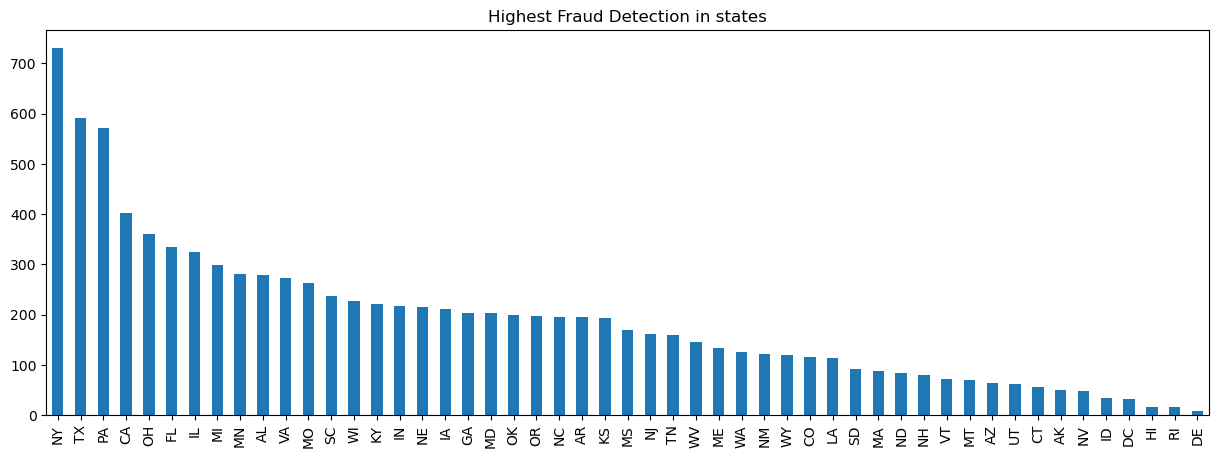

In [219]:
data_f=data[data['is_fraud']==1]
plt.figure(figsize=(15,5))
data_f['state'].value_counts().plot(kind='bar')
plt.title("Highest Fraud Detection in states")
plt.xticks(rotation=90);

#### **3.4. Checking Target variable Distribution by Category**

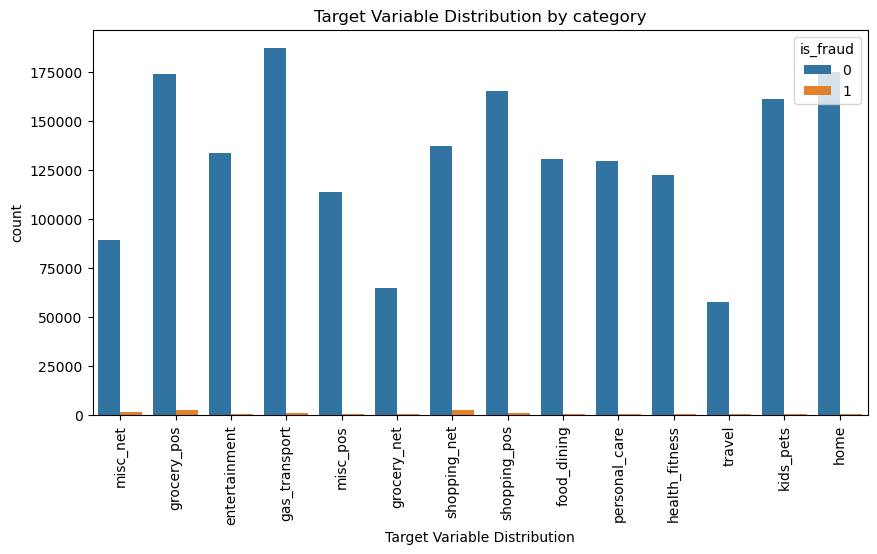

In [220]:
plt.figure(figsize=(10,5))
sns.countplot(x='category', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by category")
plt.xlabel("Target Variable Distribution")
plt.xticks(rotation=90)
plt.show()

grocery_pos       2228
shopping_net      2219
misc_net          1182
shopping_pos      1056
gas_transport      772
misc_pos           322
kids_pets          304
entertainment      292
personal_care      290
home               265
food_dining        205
health_fitness     185
grocery_net        175
travel             156
Name: category, dtype: int64


Text(0.5, 1.0, 'Highest Fraud Detection in Categories')

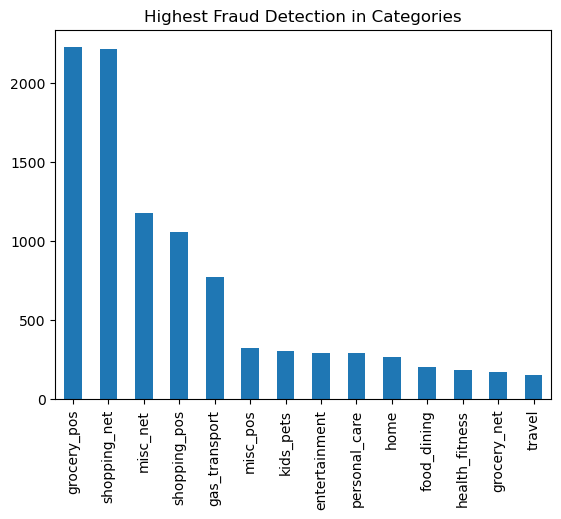

In [221]:
data_f=data[data['is_fraud']==1]
print(data_f['category'].value_counts())
data_f['category'].value_counts().plot(kind='bar')
plt.title("Highest Fraud Detection in Categories")

#### **3.5. Checking Target variable Distribution by Age**

<Axes: xlabel='is_fraud', ylabel='age'>

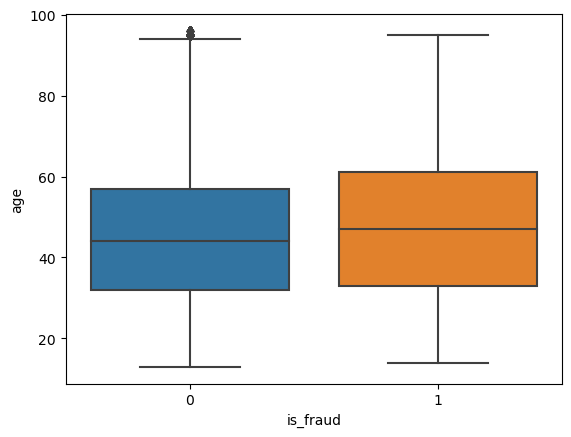

In [222]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['dob']=pd.to_datetime(data['dob'])

data['age']=round((data['trans_date_trans_time']-data['dob']).astype('timedelta64[Y]'),1)
sns.boxplot(y='age',x='is_fraud',data=data)


#### **3.6. Distributions Of Feature Values**

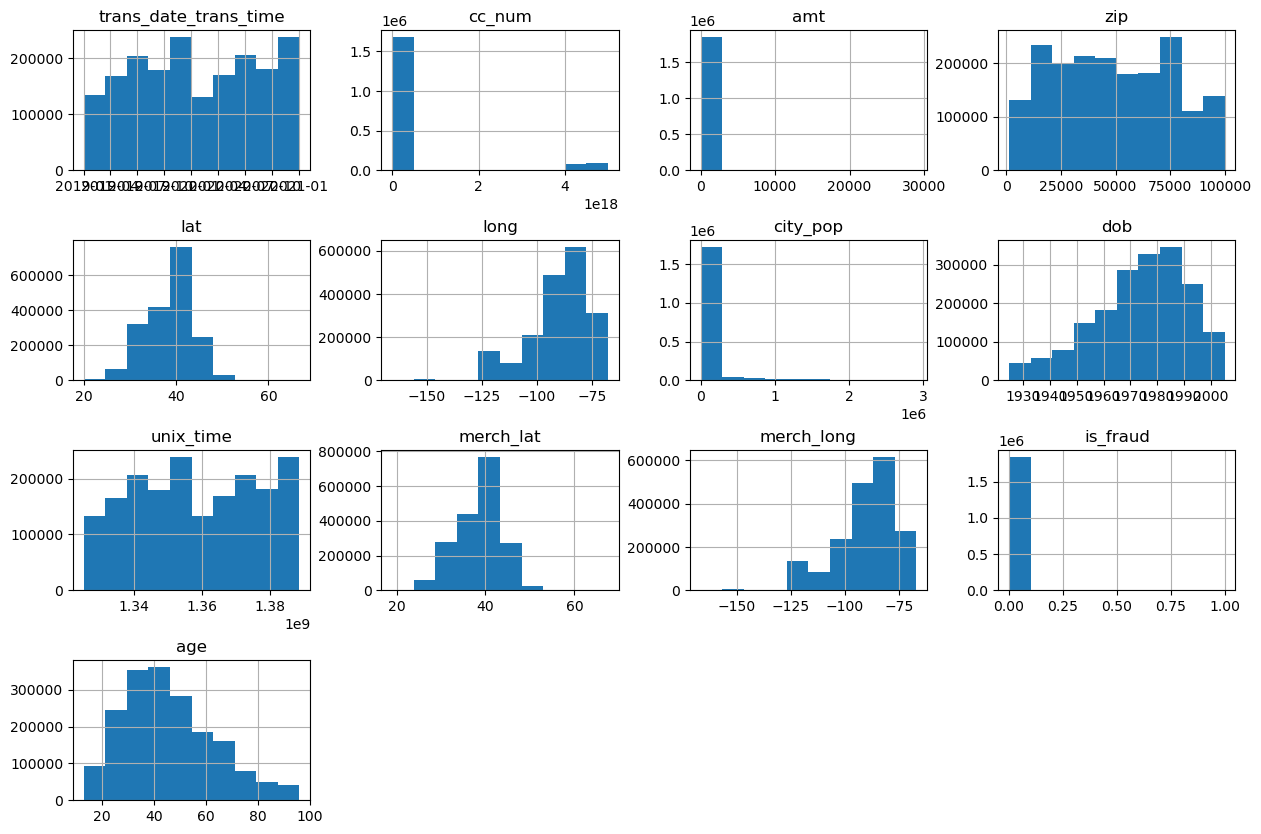

In [223]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

#### **3.7. Distribution across "Year", "Month", "Days","Hours", "Name of the Days"**

##### **3.7.1. Yearly Trend**

In [224]:
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_year'].unique()

array([2019, 2020], dtype=int64)

In [225]:
a=data['is_fraud'].groupby(data['trans_year']).value_counts().rename("Normal Count")
b=(data['is_fraud'].groupby(data['trans_year']).value_counts(normalize=True)*100).rename("Distribution")
temp_year=pd.concat([a,b],axis=1)
temp_year

Normal Count  Distribution
trans_year is_fraud                            
2019       0               919630     99.435584
           1                 5220      0.564416
2020       0               923113     99.522287
           1                 4431      0.477713

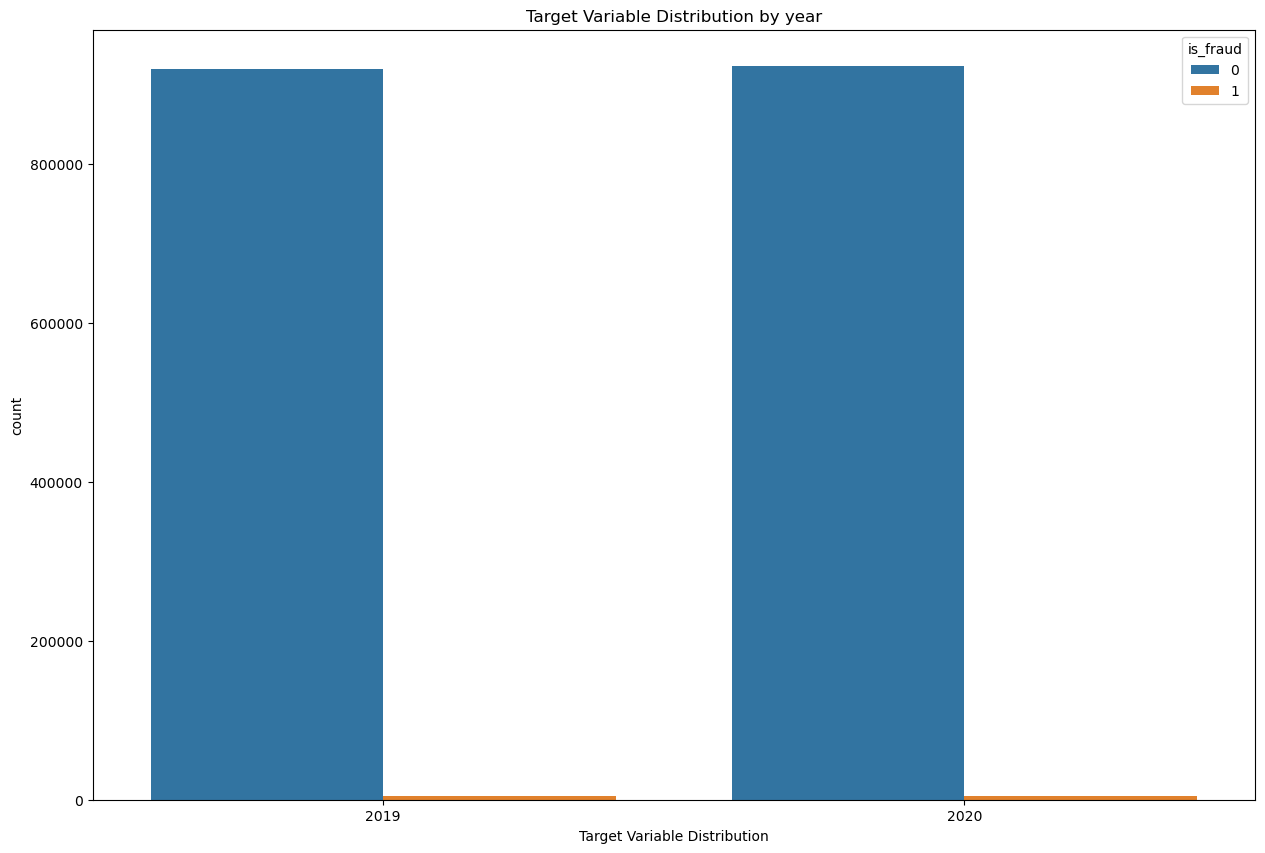

In [226]:
plt.figure(figsize=(15,10))
sns.countplot(x='trans_year', hue='is_fraud', data=data)
plt.title("Target Variable Distribution by year")
plt.xlabel("Target Variable Distribution")
plt.show()

##### **3.7.2. Monthly Trend**

In [227]:

data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [228]:
a = data['is_fraud'].groupby(data['trans_month']).value_counts().rename('Month') 
b = (data['is_fraud'].groupby(data['trans_month']).value_counts(normalize = True)*100).rename('Distribution') 
tem = pd.concat([a,b], axis = 1)
tem


Month  Distribution
trans_month is_fraud                      
1           0         103878     99.189321
            1            849      0.810679
2           0          96804     99.126535
            1            853      0.873465
3           0         142851     99.347655
            1            938      0.652345
4           0         134292     99.497666
            1            678      0.502334
5           0         145940     99.363404
            1            935      0.636596
6           0         173048     99.527805
            1            821      0.472195
7           0         171792     99.621906
            1            652      0.378094
8           0         175321     99.547462
            1            797      0.452538
9           0         139427     99.459286
            1            758      0.540714
10          0         137268     99.393220
            1            838      0.606780
11          0         142374     99.523264
            1            682      0.476736
12          0         279748     99.697076
            1            850      0.302924

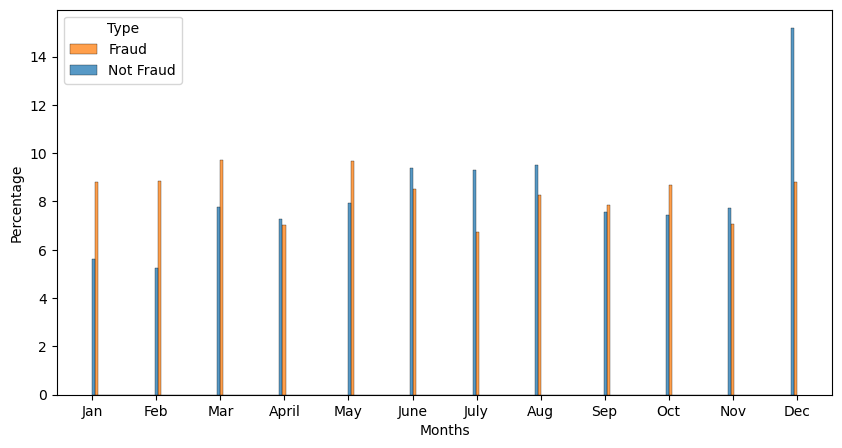

In [229]:
plt.figure(figsize=(10,5))
ax=sns.histplot(data=data,x='trans_month',hue='is_fraud',common_norm=False, stat='percent', multiple='dodge')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","April","May","June","July","Aug","Sep","Oct","Nov","Dec"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Months')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


##### **3.7.3. Daily Trend**

In [230]:

data['trans_days']=data['trans_date_trans_time'].dt.day
data['trans_days'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

([<matplotlib.axis.XTick at 0x2b2ffff7a60>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31')])

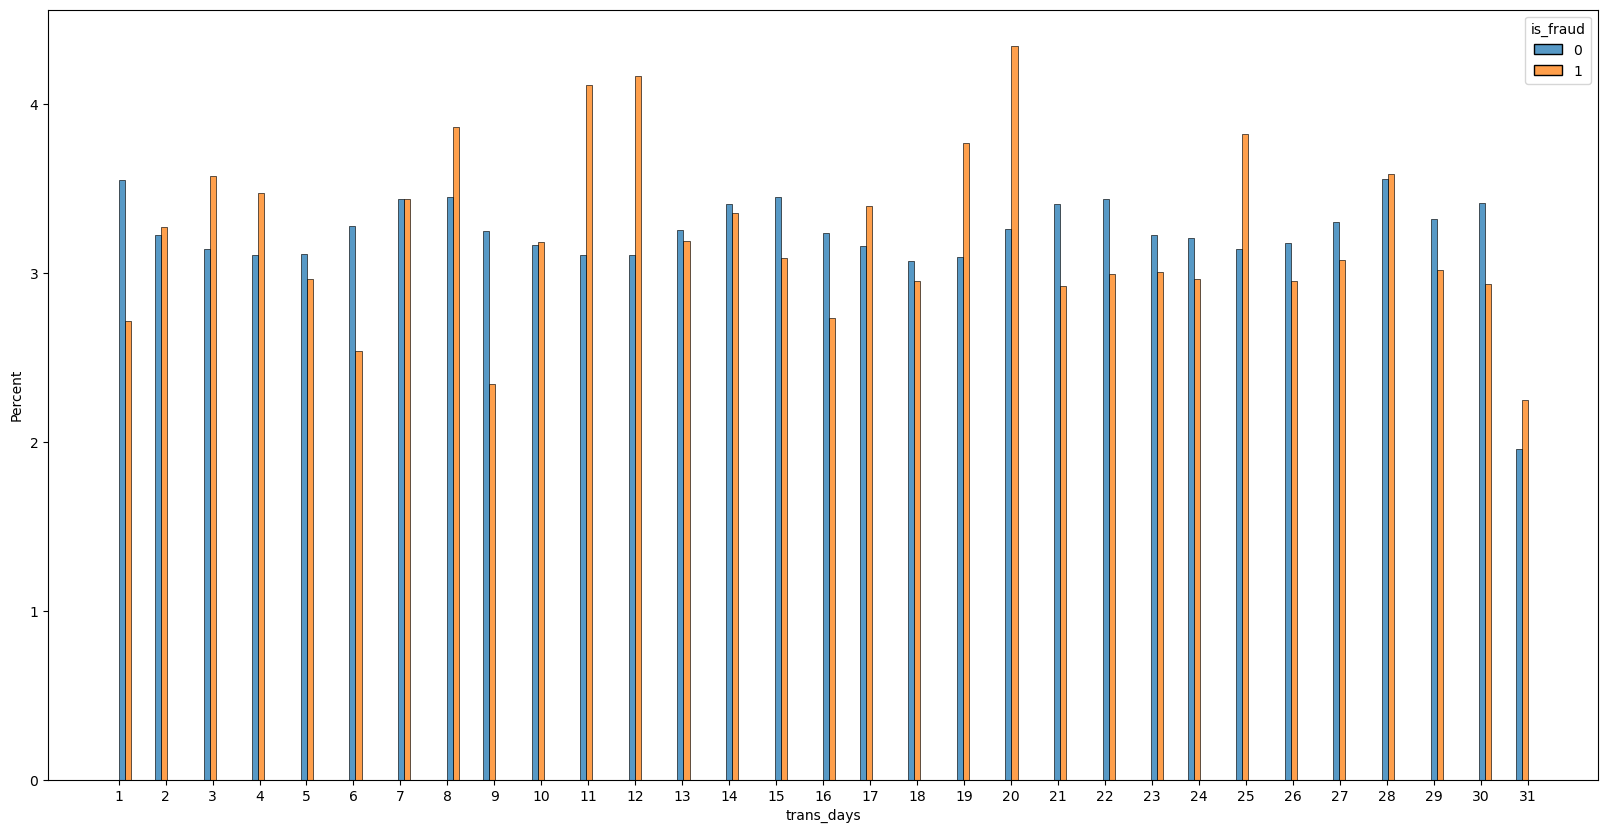

In [231]:
plt.figure(figsize=(20,10))
ax=sns.histplot(data=data,x='trans_days',hue="is_fraud",common_norm=False,stat='percent',multiple='dodge')
plt.xticks(np.arange(1,32,1))

##### **3.7.4. Weekly Trend**

In [232]:
data['trans_week_days']=data['trans_date_trans_time'].dt.day_name()
data['trans_week_days'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

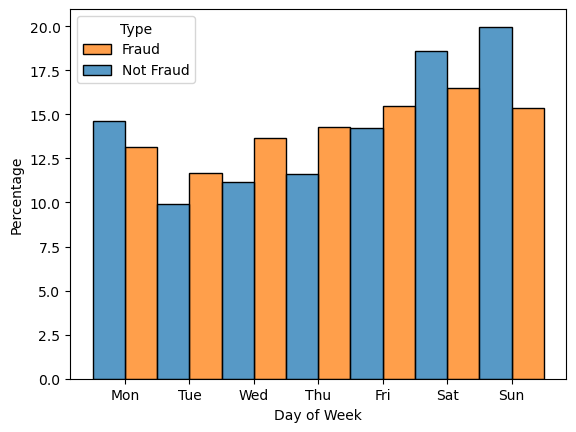

In [233]:
ax=sns.histplot(data=data, x="trans_week_days", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

##### **3.7.5. Hourly Trend**

In [234]:

data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

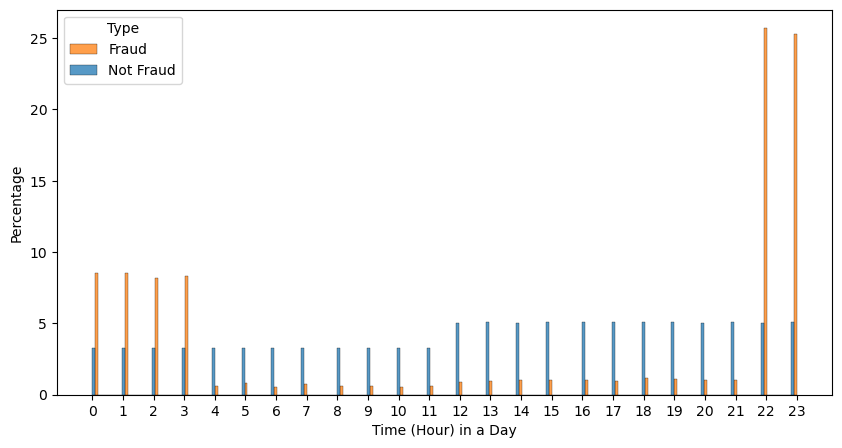

In [235]:
plt.figure(figsize=(10,5))
ax=sns.histplot(data=data,x='trans_hour',hue='is_fraud',common_norm=False, stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#### **3.8. Distributions Of Amount**


In [236]:
data['amt'].groupby(data['is_fraud']).sum()

is_fraud
0    1.246639e+08
1    5.121413e+06
Name: amt, dtype: float64

In [237]:
data['amt'].groupby(data['is_fraud']).describe().T


is_fraud,0,1
count,1.842743e+06,9651.000000
mean,6.765128e+01,530.661412
std,1.535481e+02,391.028873
min,1.000000e+00,1.060000
25%,9.610000e+00,240.075000
50%,4.724000e+01,390.000000
75%,8.256000e+01,902.365000
max,2.894890e+04,1376.040000


<Axes: xlabel='is_fraud', ylabel='amt'>

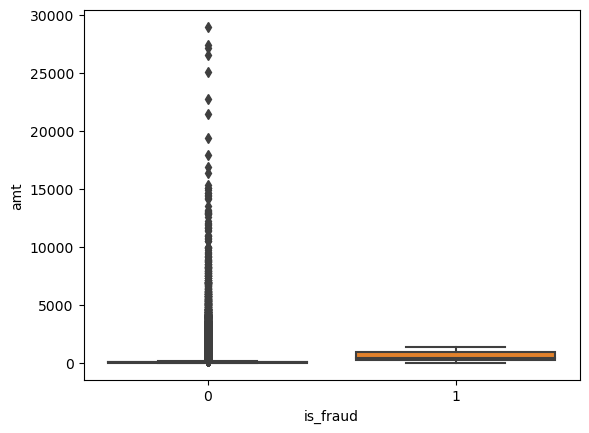

In [238]:
sns.boxplot(y='amt',x='is_fraud',data=data)

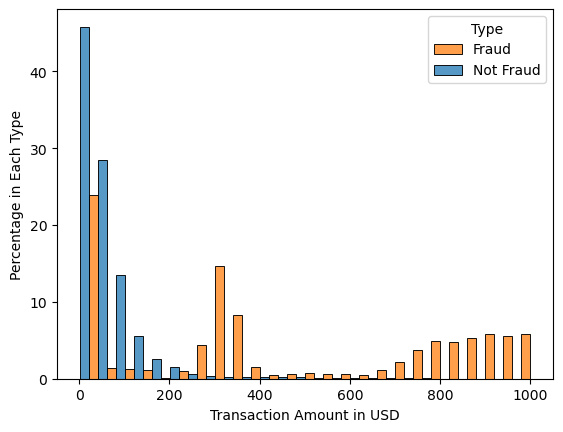

In [239]:
ax=sns.histplot(x='amt',data=data[data.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

### **4. Saving Data**

In [240]:
data.shape

(1852394, 29)

In [241]:
data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
label                            object
age                             float64
trans_year                        int64


In [242]:
# save the data to a new csv file
data.to_csv("../data/clean_data.csv")